In [3]:
import requests
from lxml import etree
import re
import csv
import os


class doubanMovies:
    #headers 头部信息
    #allDataList 存储所有信息的二维列表，
    def __init__(self,headers,allDataList):
        self.headers = headers
        self.allDataList = allDataList

    #爬取电影信息
    def getMoviesInfo(self,pageUrl,i):

        html = requests.request('get', url=pageUrl, headers=headers)
        # 设置网页编码格式
        html.encoding = 'utf8'
        text = html.text
        tree = etree.HTML(text)

        items = tree.xpath('//ol/li/div/div[@class="info"]')

        for item in items:
            #电影名
            name = item.xpath("./div[@class= 'hd']/a/span[1]/text()")[0]
            #电影别名
            otherName = item.xpath("./div[@class='hd']/a/span[@class='other']/text()")
            #过滤后的电影别名
            clean_OtherName = otherName[0].split('/',1)[1].replace('  ',"").lstrip()
            #导演各种信息
            bd_info = item.xpath("./div[@class='bd']/p[1]/text()")#返回一个列表
            #导演
            director = bd_info[0].replace("\n", "").split('   ')
            clean_director = director[0].split(':')[1].strip()

            info_1 = bd_info[1].strip().replace("\n", "").split(' / ')
            #年份
            year = info_1[0].strip()
            #国家
            country = info_1[1].strip()
            #类型
            type = info_1[2].strip()
            #评分
            rating = item.xpath("./div[@class='bd']/div[@class='star']/span[2]/text()")[0]
            #评分人数
            evaluation_num = item.xpath("./div[@class='bd']/div[@class='star']/span[4]/text()")
            clean_evaluation_num =re.findall(r'\d+',evaluation_num[0])[0]
            #一句话简介
            quote_tag = item.xpath("./div[@class='bd']/p/span[@class='inq']")
            # 注意可能可能没有quote简评
            if len(quote_tag) is not 0:
                quote = quote_tag[0].text
            else:
                quote=""

            list = [i,name,clean_OtherName,clean_director,year,country,type,rating,clean_evaluation_num,quote]
            i = i+1
            allDataList.append(list)


    def getPageUrl(self):
        for i in range(0,250,25):
            Pageurl = "https://movie.douban.com/top250?start={}&filter=".format(i)
            print(Pageurl)
            movies.getMoviesInfo(Pageurl,i+1)

    #将数据写入csv文件
    def writeToCsv(self,allDataList):

        path = r'./data/'
        if not os.path.exists(path):
            os.mkdir(path)

        with open(path+"movies.csv","w",encoding='utf-8-sig',newline="") as csvfile:
            writer = csv.writer(csvfile)
            #列名
            writer.writerow(['Top250','MovieName', 'OtherName', 'Director',
                             'Year', 'Country', 'Type', 'Rating', 'EvaluationNum',
                             'quote'])
            writer.writerows(allDataList)

    #main方法
    def main(self,allDataList):
        movies.getPageUrl()
        movies.writeToCsv(allDataList)

# 头部信息
headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'
}
allDataList = []
movies = doubanMovies(headers,allDataList)
movies.main(allDataList)

<>:54: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:54: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-3-8b681dc71d34>:54: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(quote_tag) is not 0:


https://movie.douban.com/top250?start=0&filter=
https://movie.douban.com/top250?start=25&filter=
https://movie.douban.com/top250?start=50&filter=
https://movie.douban.com/top250?start=75&filter=
https://movie.douban.com/top250?start=100&filter=
https://movie.douban.com/top250?start=125&filter=
https://movie.douban.com/top250?start=150&filter=
https://movie.douban.com/top250?start=175&filter=
https://movie.douban.com/top250?start=200&filter=
https://movie.douban.com/top250?start=225&filter=


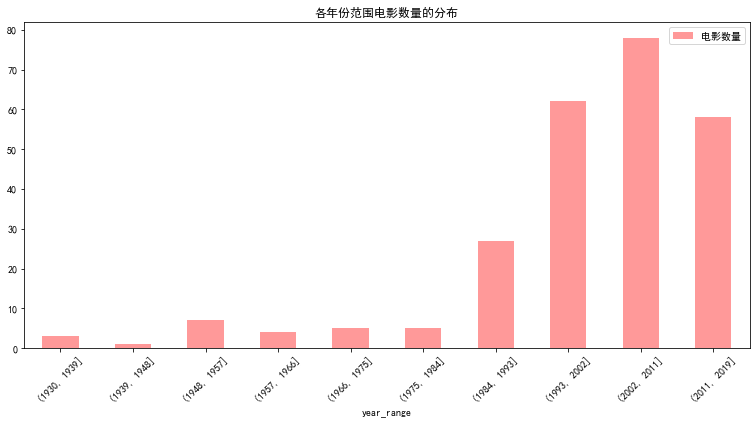

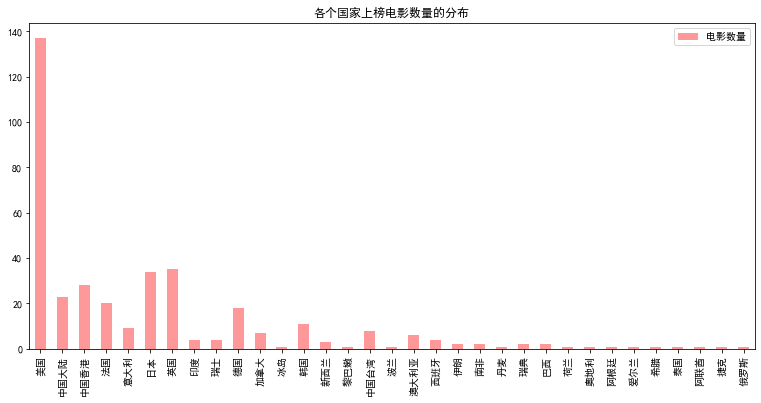

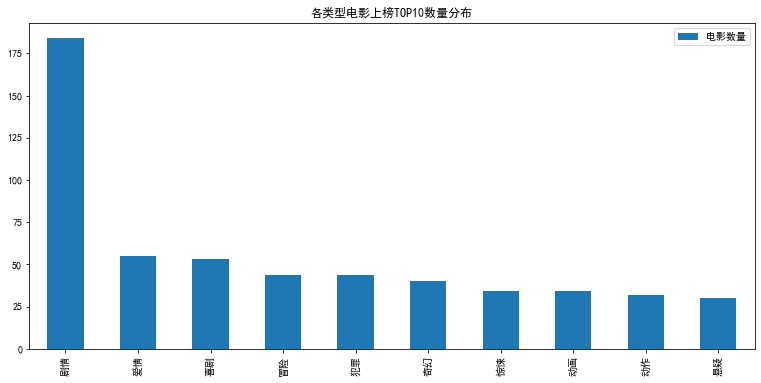

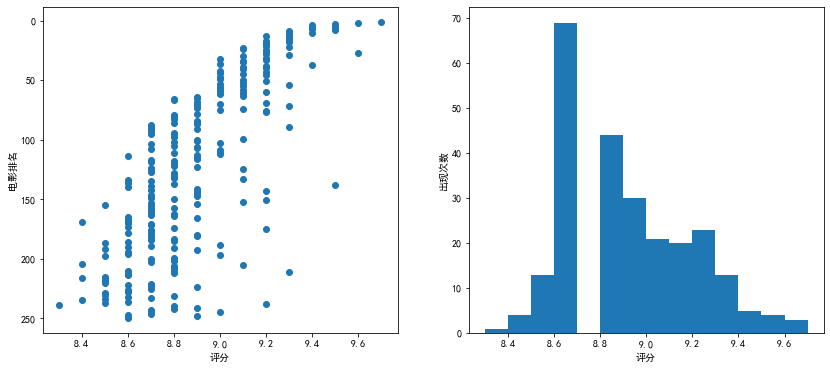

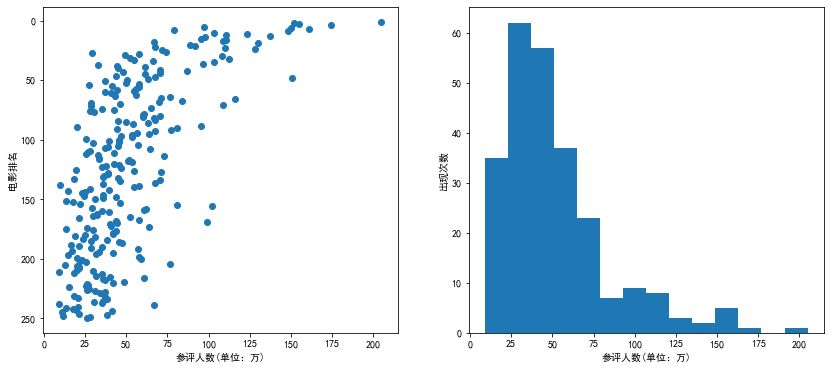

In [47]:
import pandas as pd
from functools import reduce
from collections import Counter
import matplotlib.pyplot as plt
from pylab import * 
import wordcloud
import jieba

# 设置中文字体为黑体
mpl.rcParams['font.sans-serif'] = ['SimHei']

# 导入输出图片工具
from pyecharts.render import make_snapshot
# 使用snapshot_selenium 渲染图片
from snapshot_selenium import snapshot

# 按年份进行分组
def year_group(year):
    # 判断，有两部电影的年份包含制作国家
    if len(year) > 4:
        year = year[0:4]
    year = int(year)

    if (year > 1930) and (year <= 1939):
        return '(1930, 1939]'
    elif (year > 1939) and (year <= 1948):
        return '(1939, 1948]'
    elif (year > 1948) and (year <= 1957):
        return '(1948, 1957]'
    elif (year > 1957) and (year <= 1966):
        return '(1957, 1966]'
    elif (year > 1966) and (year <= 1975):
        return '(1966, 1975]'
    elif (year > 1975) and (year <= 1984):
        return '(1975, 1984]'
    elif (year > 1984) and (year <= 1993):
        return '(1984, 1993]'
    elif (year > 1993) and (year <= 2002):
        return '(1993, 2002]'
    elif (year > 2002) and (year <= 2011):
        return '(2002, 2011]'
    elif (year > 2011) and (year <= 2019):
        return '(2011, 2019]'


# 对电影的上映年份进行分析统计
def analyze_year():
    # pandas显示所有列或所有行
    pd.set_option('display.max_rows', None)
    df['year_range'] = df['Year'].apply(year_group)
    year = df.groupby('year_range')['MovieName'].count()
    index= year.index
    values = year.values
    
    ts = pd.Series(values, index=index)
    ts.plot(
        kind='bar',
        title = '各年份范围电影数量的分布',
        rot = 45,
        color = 'red',
        alpha = 0.4,
        figsize=(13, 6)
    )
    plt.legend(['电影数量'])
    # 输出图表
    plt.savefig('./charts/各年份范围电影数量的分布.png',
               dpi=400,
               bbox_inches = 'tight')
    

# 对电影的制作国家进行分析统计
def analyze_country():
    #lambda表达式进行以空格分开，并返回列表
    countryList = reduce(lambda x, y: x + y, list(df['Country'].apply(lambda x: x.split(' '))))
    #进行分类统计
    countryDic = Counter(countryList)
    #将字典转为DataFrame
    country_dataframe = pd.DataFrame.from_dict(countryDic, orient='index')

    country_dataframe.plot(
        kind='bar',
        title = '各个国家上榜电影数量的分布',
        rot = 90,
        color = 'red',
        alpha = 0.4,
        figsize=(13, 6)
    )
    plt.legend(['电影数量'])
    # 输出图表
    plt.savefig('./charts/各个国家上榜电影数量的分布.png',
               dpi=400,
               bbox_inches = 'tight')

# 对电影不同类型进行分析统计
def analyze_type():
    # 电影类型统计
    all_type = df['Type'].str.split(' ').apply(pd.Series)
    type_text = all_type.to_string(header=False, index=False)
    all_type = all_type.apply(pd.value_counts).fillna('0')
    all_type.columns = ['type1', 'type2', 'type3', 'type4', 'type5']
    all_type['type1'] = all_type['type1'].astype(int)
    all_type['type2'] = all_type['type2'].astype(int)
    all_type['type3'] = all_type['type3'].astype(int)
    all_type['type4'] = all_type['type4'].astype(int)
    all_type['type5'] = all_type['type5'].astype(int)
    all_type['all_counts'] = all_type['type1'] + all_type['type2'] \
                             + all_type['type3'] + all_type['type4'] + all_type['type5']

    all_type = all_type.sort_values(['all_counts'], ascending=False)
    # 取电影类型前10做分析
    movie_type = pd.DataFrame({'数量': all_type['all_counts']})[:10]
#     print(movie_type[:10])
    movie_type.plot(
                    kind='bar',
                    figsize=(13, 6),
                    title = '各类型电影上榜TOP10数量分布')
    plt.legend(['电影数量'])
    # 输出图表
    plt.savefig('./charts/各类型电影上榜TOP10数量分布.png',
               dpi=400,
               bbox_inches = 'tight')
    
# 评分与排名关系分析
def analyze_rating():
#     评分与排名的关系散点图 
    plt.figure(figsize=(14, 6)) 
    plt.subplot(1, 2, 1) 
    plt.scatter(df['Rating'], df['Top250'])
    plt.xlabel('评分') 
    plt.ylabel('电影排名')
    plt.gca().invert_yaxis()
    # 评分数量直方图
    plt.subplot(1, 2, 2) 
    plt.hist(df['Rating'], bins=14) 
    plt.xlabel('评分')
    plt.ylabel('出现次数')
    plt.savefig('./charts/评分与排名关系分析.png',
               dpi=400,
               bbox_inches = 'tight')
#     plt.close()

# 评分与评价人数关系分析
def analyze_evaluationNum():
    #     评分与评价人数的关系散点图 
    plt.figure(figsize=(14, 6)) 
    plt.subplot(1, 2, 1) 
    l1 = list(i / 10000 for i in df['EvaluationNum'].values)
    plt.scatter(l1, df['Top250'])
    plt.xlabel('参评人数(单位：万)') 
    plt.ylabel('电影排名')
    plt.gca().invert_yaxis()
    # 评分数量直方图
    plt.subplot(1, 2, 2) 
    plt.hist(l1, bins=14) 
    plt.xlabel('参评人数(单位：万)')
    plt.ylabel('出现次数')
    plt.savefig('./charts/评分与评价人数分析.png',
               dpi=400,
               bbox_inches = 'tight')

# 对热门短评进行主题分析，生成词云
def comment_wordcloud():
        text = ''
        for i in df['quote'].values:
            text += str(i)

        counts = {}
        words = jieba.lcut(text)
        for word in words:
            if len(word) == 1:
                continue
            counts[word] = counts.get(word, 0) + 1
        # print(counts)
        wcloud = wordcloud.WordCloud(
            font_path='./common/SimSun.ttf',
            background_color= 'white',width=1000,
            max_words= 50,
            height= 860, margin= 1
        ).fit_words(counts)
        wcloud.to_file('短评词云.png')

    
    
if __name__ == '__main__':

    # 读取CSV文件
    df = pd.read_csv(r'./data/movies.csv')
    analyze_year()
    analyze_country()
    analyze_type()
    analyze_rating()
    analyze_evaluationNum()
    comment_wordcloud()



